Pamiętaj o zainstalowaniu pakietów: shapely, geopandas i mapclassify

In [1]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

## Dane demograficzne w dzielnicach

Dane ładujemy za pomocą ``gpd.read_file()``. Należy pamiętać, że wszystkie typy plików razem z .shp powinny znaleźć się w tym samym folderze. Wczytaj dane geograficzne z roku 2019go:

In [2]:
jebniecia = gpd.read_file('Wypadki_i_kolizje_drogowe/2019_zdarzenia_dr.shp')
szczegoly = gpd.read_file('Wypadki_i_kolizje_drogowe/2019_szczegoly_zdarzen_dr.shp')

KOLIZJE \
WYPADKI \
POJ_SUMA - Łączna liczba pojazdów \
POJ_ROWER - W tym rowery \
POJ_TRAM - w tym tramwaje \
POJ_BUS - W tym autobusy komunikacji publicznej \
UCZ_SUMA - Łączna liczba uczestników \
UCZ_PIESI - W tym piesi \
Z_SUMA - Liczba zabitych łącznie \
Z_PIESI - w tym Liczba zabitych pieszych\
Z_IN - w tym Liczba zabitych innych uczestników \
CR_SUMA - Liczba ciężko rannych pieszych \
CR_PIESI - w tym Liczba lekko rannych pieszych \
CR_IN - w tym Liczba ciężko rannych innych uczestników \
LR_SUMA - Liczba lekko rannych łącznie \
LR_PIESI - W tym piesi \
LR_IN - W tym inni \
DZIECI \
ROK

In [40]:
row_piesz = jebniecia[(jebniecia.UCZ_PIESI > 0) | (jebniecia.POJ_ROWER > 0)]

Posumujmy liczbę mieszkańców po kategorii wiekowej:

In [48]:
szczegoly[['UL', 'ADR', 'SKRZ_Z_UL', 'TYP',
       'RDZ', 'PRZYCZYNA', 'PARAM_MSCA', 'CHAR_MSCA', 'RDZ_DR', 'RDZ_NAW',
       'STAN_NAW', 'SYGN', 'OZN_POZ', 'OSW', 'WAR_ATM', 'USZK_P_POJ', 'ROK',
       'geometry']]


,UL,ADR,SKRZ_Z_UL,TYP,RDZ,PRZYCZYNA,PARAM_MSCA,CHAR_MSCA,RDZ_DR,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,geometry
0,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, nie działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
1,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
2,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
3,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów boczne,kierowca: nieprawidłowe zmienianie pasa ruchu,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,noc - droga oświetlona,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
4,al. Armii Krajowej,None,Krakowska,kolizja,zderzenie pojazdów boczne,kierowca: nieustąpienie pierwszeństwa przejazdu,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednokierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6434831.560 5661693.732)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12850,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: nieprawidłowe zmienianie pasa ruchu,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12851,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12852,al. Brücknera,54,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: niestosowanie się do sygnalizacji św...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)


Wykorzystajmy funkcję describe

In [42]:
szczegoly_row_piesz = szczegoly.iloc[row_piesz.index]
szczegoly_row_piesz

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,RDZ_DR,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,geometry
8,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6430902.749 5658615.378)
45,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427203.268 5665780.407)
48,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427203.268 5665780.407)
50,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednokierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433392.439 5661313.785)
52,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednokierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433392.439 5661313.785)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6428559.191 5662744.099)
9414,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433270.248 5664068.609)
9434,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,nie ma,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427730.758 5660008.154)
9449,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,nie ma,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6421775.738 5668306.795)


Wyplotujmy sobie przestrzenie zawarte w kolumnie 'geometry'

In [77]:
szczegoly_row_piesz['STAN_NAW'].value_counts()
# szczegoly_row_piesz['UL'].hist(bins=szczegoly_row_piesz['UL'].unique().size)
# help(szczegoly_row_piesz['UL'].hist)

sucha                                               648
mokra                                               145
oblodzenie, zaśnieżenie                               6
mokra;oblodzenie, zaśnieżenie                         5
sucha;dziury, wyboje                                  3
dziury, wyboje                                        1
kałuże, rozlewiska                                    1
mokra;kałuże, rozlewiska;oblodzenie, zaśnieżenie      1
koleiny, garby                                        1
sucha;koleiny, garby                                  1
Name: STAN_NAW, dtype: int64

Wyciągnij powierzchnię każdej dzielnicy za pomocą odpowiedniego parametru:

Wyplotujmy mapę przedstawiającą wartości wybranej zmiennej:

Text(0.5, 1.0, 'Gęstość zaludnienia we Wro')

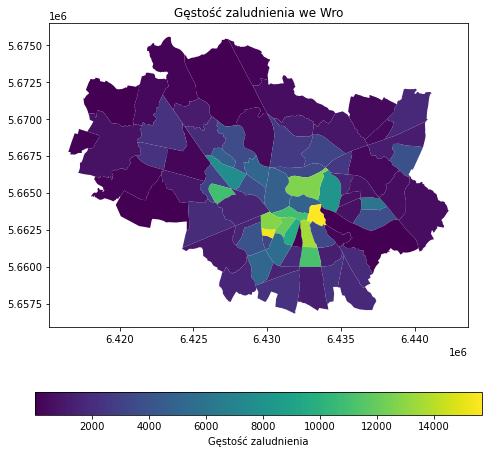

In [7]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         legend_kwds = {
             'label': 'Gęstość zaludnienia',
             'orientation': 'horizontal'
         },
         figsize=(8,8))
plt.title('Gęstość zaludnienia we Wro')

Z legendą pod spodem

Zmieńmy kolorystykę za pomocą argumentu ``cmap``. Więcej opcji dostępnych tutaj:
https://matplotlib.org/tutorials/colors/colormaps.html

Wyplotuj jedynie granice:

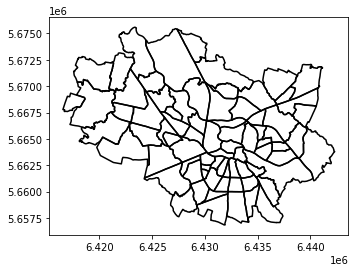

In [6]:
dane.boundary.plot(color='black')

Z automatycznym podziałem na kategorie:

metody: ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’

Text(0.5, 1.0, 'Gęstość zaludnienia we Wro')

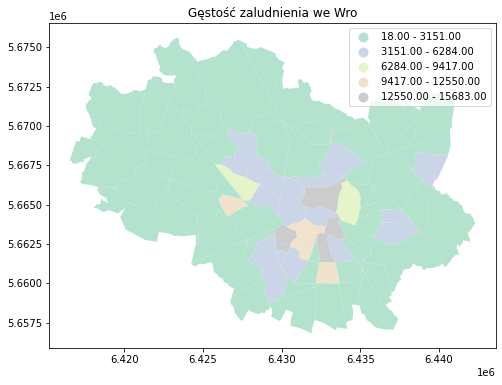

In [10]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         figsize=(8,8),
         cmap='Pastel2',
         scheme='equal_interval')
plt.title('Gęstość zaludnienia we Wro')

Co w przypadku kiedy mamy brakujące dane?

In [16]:
dane['LUD_NA_KM2'].iloc[0:5,] = np.nan

Text(0.5, 1.0, 'Gęstość zaludnienia we Wro')

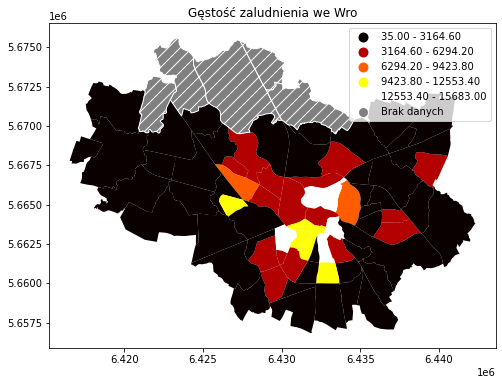

In [23]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         figsize=(8,8),
         cmap='hot',
         scheme='equal_interval',
         missing_kwds={
             'color': 'grey',
             'label': 'Brak danych',
             'edgecolor': 'white',
             'hatch': '//'
         })
plt.title('Gęstość zaludnienia we Wro')

## Wypadki i zdarzenia drogowe

Pobierzmy kolejny zbiór danych - dotyczący wypadków i zdarzeń drogowych w 2019 roku

In [38]:
wypadki = gpd.read_file('Wypadki_i_kolizje_drogowe/2019_szczegoly_zdarzen_dr.shp')

In [39]:
wypadki

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,RDZ_DR,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,geometry
0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, nie działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
1,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
3,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,noc - droga oświetlona,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
4,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednokierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6434831.560 5661693.732)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12850,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12851,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12852,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)


Jakiego typu są obiekty w kolumnie 'geometry'

In [40]:
type(wypadki['geometry'])

geopandas.geoseries.GeoSeries

Przedstaw je na wykresie

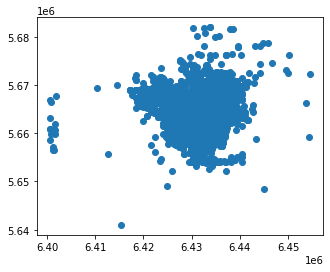

In [41]:
wypadki.plot()

Wyciągnij wypadki, gdzie była conajmniej jedna ofiara śmiertelna

Text(0.5, 1.0, 'Wypadki śmiertelne')

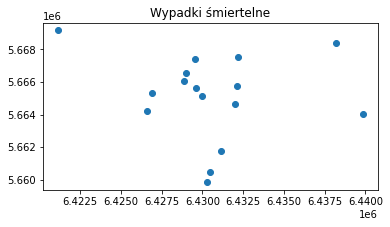

In [43]:
wypadki[wypadki['Z_SUMA'] > 0].plot()
plt.title('Wypadki śmiertelne')

Nanieś punkty z wypadków śmiertelnych na mapę wrocławia:

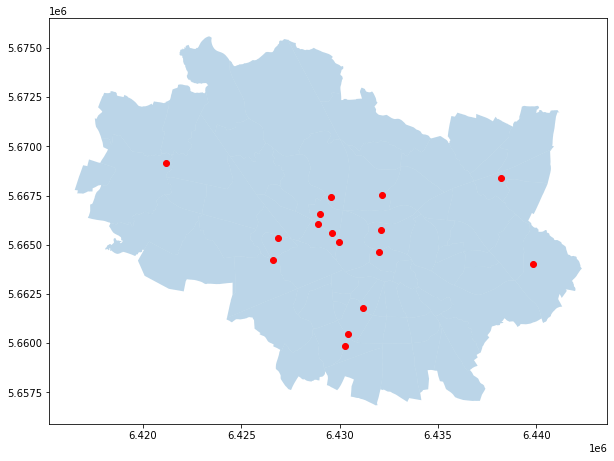

In [46]:
wykres = dane.plot(
    figsize=(10,10), alpha=0.3
)
wypadki[wypadki['Z_SUMA'] > 0].plot(ax=wykres, color='red')

Za pomocą operacji w geopandasie oblicz liczbę wypadków w 2019 per osiedle. Wykorzystaj łączenie danych geograficznych
https://geopandas.org/mergingdata.html

In [48]:
liczba_wypadkow = gpd.sjoin(dane[['NAZWA', 'geometry']], wypadki[['geometry']]).groupby(['NAZWA']).size()

Wyplotuj mapę wrocławia w zależności od liczby wypadków

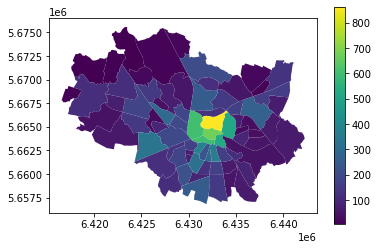

In [50]:
dane[['NAZWA', 'geometry']].merge(liczba_wypadkow.rename('new'), left_on='NAZWA', right_index=True).plot(
    column='new',
    legend=True
)

## Ścieżki rowerowe

Wczytaj informacje o danych dotyczących tras_rowerowych

In [51]:
sciezki = gpd.read_file('trasy_rowerowe/TrasyRowerowe.shp')

Ile mamy obserwacji w zbiorze?

In [67]:
sciezki.shape

(11963, 4)

Jakie są tam kolumny i dane?

In [58]:
sciezki.dtypes

TYP            object
KIERUNEK      float64
SHAPE_LEN     float64
geometry     geometry
dtype: object

Jakie są typy ścieżek rowerowych?

In [60]:
sciezki['TYP'].unique()

array(['strefa ruchu uspokojonego 20 i 30 km/h', 'możliwość przejazdu',
       'łącznik drogowy', 'kontraruch', 'kontrapas',
       'pas ruchu dla rowerów', 'droga dla rowerów', 'pas BUS + ROWER',
       'trasa na wałach', 'droga dla pieszych i rowerów',
       'trasa przez park'], dtype=object)

Jakiego typu są elementy w kolumnie ``geometry``?

In [62]:
sciezki['geometry']

0        LINESTRING (6428061.892 5661033.228, 6428055.3...
1        LINESTRING (6428255.152 5660919.295, 6428247.5...
2        LINESTRING (6428159.612 5660970.703, 6428148.8...
3        LINESTRING (6428255.152 5660919.295, 6428260.7...
4        LINESTRING (6428159.612 5660970.703, 6428167.2...
                               ...                        
11958    LINESTRING (6426985.673 5667734.242, 6426988.7...
11959    LINESTRING (6426955.642 5667617.682, 6426956.7...
11960    LINESTRING (6427043.288 5667778.526, 6427049.9...
11961    LINESTRING (6426899.360 5667381.851, 6426900.2...
11962    LINESTRING (6426898.399 5667631.860, 6426955.6...
Name: geometry, Length: 11963, dtype: geometry

Jaką długość mają linie wyznaczone przez ``geometry``?

In [63]:
sciezki['geometry'].length

0         85.615596
1        108.519110
2        116.072516
3         69.881285
4         66.468242
            ...    
11958     82.159801
11959    120.553121
11960     43.354680
11961    242.454057
11962     58.972678
Length: 11963, dtype: float64

Jaką długość mają wszystkie ścieżki rowerowe w mieście?

In [65]:
sciezki['geometry'].length.sum() / 1000 #km

1311.6738750045224

Ile Wrocław ma kilometrów dróg typu 'droga dla rowerów'

In [66]:
sciezki[sciezki['TYP'] == 'droga dla rowerów']['geometry'].length.sum() / 1000

92.89127374107507

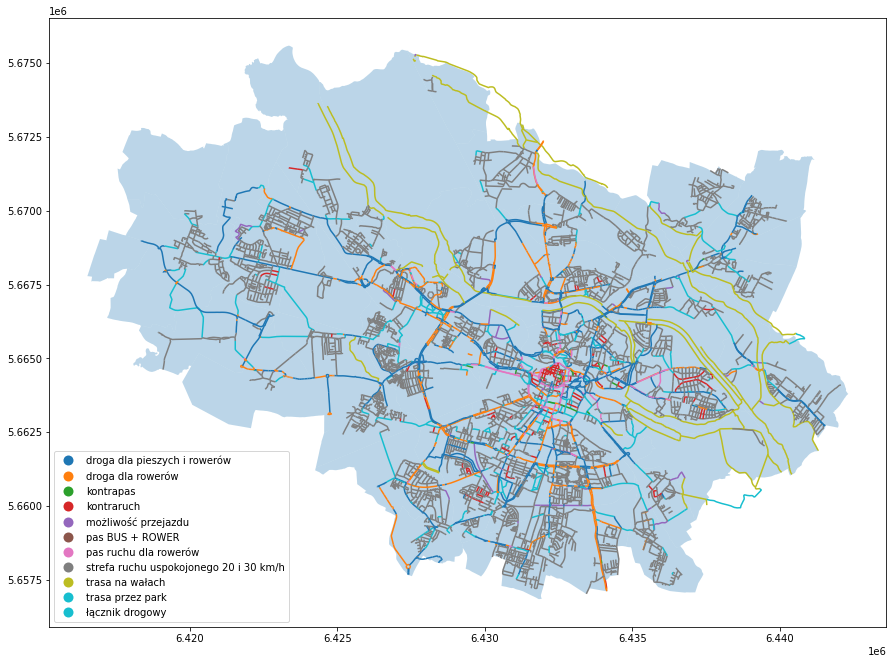

In [73]:
wykres = dane.plot(figsize=(15,15), alpha=0.3)
sciezki.plot(column='TYP', ax=wykres, legend=True, legend_kwds={'loc': 'lower left'})

## Zadania samodzielne

Zadanie samodzielne:

Wczytaj dane punktowe dotyczące wysokości budynków. Połącz punkty z odpowiadającymi im dzielnicami, i oblicz średnią wysokość budynków per dzielnica. Wyniki przedstaw na mapie

Zadanie samodzielne 2:

Oblicz która dzielnica ma najwięcej dróg rowerowy na kilometr kwadratowy powierzchni. Hint: dokonaj spatial joina między dzielnicami i linestringami, a następnie posumuj długość ścieżek dla dzielnicy (``.length`` i podziel przez powierzchnię ``.area``)